In [2]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Linear Regression

### 1. The Normal Equation

In [3]:
import numpy as np

# 예제 코드
np.random.seed(42)
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

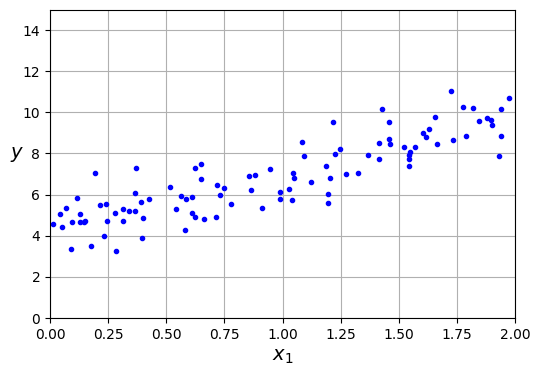

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [10]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # 0열에 1 데이터 추가
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y  # @: 행렬 곱셈 연산자

[역행렬]
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msup>
    <mi>A</mi>
    <mrow data-mjx-texclass="ORD">
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </msup>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <mrow>
      <mi>a</mi>
      <mi>d</mi>
      <mo>&#x2212;</mo>
      <mi>b</mi>
      <mi>c</mi>
    </mrow>
  </mfrac>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">[</mo>
    <mtable columnspacing="1em" rowspacing="0.9em 0.9em">
      <mtr>
        <mtd>
          <mi>d</mi>
        </mtd>
        <mtd>
          <mo>&#x2212;</mo>
          <mi>b</mi>
        </mtd>
      </mtr>
      <mtr>
        <mtd>
          <mo>&#x2212;</mo>
          <mi>c</mi>
        </mtd>
        <mtd>
          <mi>a</mi>
        </mtd>
      </mtr>
    </mtable>
    <mo data-mjx-texclass="CLOSE">]</mo>
  </mrow>
</math>

In [6]:
print(theta_best)

[[4.21509616]
 [2.77011339]]


In [11]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

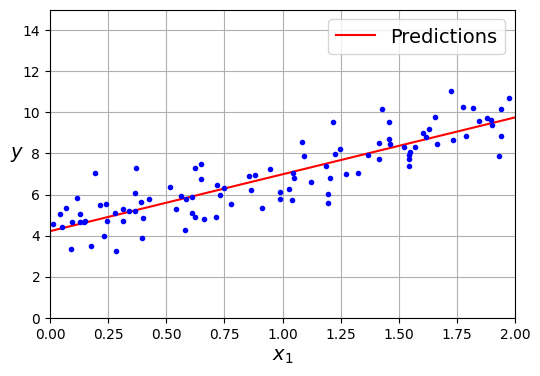

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, 'b.')

plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc='upper right')
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [14]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [15]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [16]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

# Gradient Descent

### Batch Gradient Descent

In [18]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2, 1)  # 초기 파라미터 설정

for epochs in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [19]:
theta

array([[4.21509616],
       [2.77011339]])

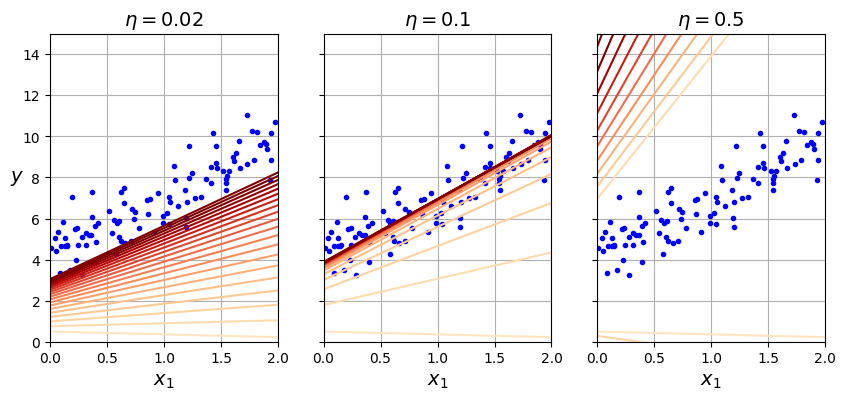

In [22]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, 'b.')
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle='solid', color=color)

        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel('$x_1$')
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr'$\eta = {eta}$')
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  #

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel('$y$', rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
plt.show()